# Plotting turnstile data

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from Utils import ReadTurnstilesDataBase
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

In [3]:
[ana_turnstile_df, mauricio_turnstile_df] = ReadTurnstilesDataBase.readTurnstileData()

In [4]:
ana_turnstile_df = ReadTurnstilesDataBase.processAnaTurnstiles(ana_turnstile_df)

In [5]:
#ReadTurnstilesDataBase.printTurnstile(ana_turnstile_df,mauricio_turnstile_df)

In [6]:
ana_turnstile_df['day'] = ana_turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.day))
ana_turnstile_df['month'] = ana_turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.month))
ana_turnstile_df['year'] = ana_turnstile_df['fecha_instalacion'].apply(lambda x: "%d" % (x.year))
ana_turnstile_df['month_year'] = ana_turnstile_df['fecha_instalacion'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [7]:
ana_turnstile_df.head()

,UN,sitio_subida,fecha_instalacion,day,month,year,month_year
0,U1,WA-9900,2017-05-30,30,5,2017,5/2017
1,U1,ZN-6458,2017-05-30,30,5,2017,5/2017
2,U1,BJFD-16,2017-05-31,31,5,2017,5/2017
3,U1,ZN-5962,2017-05-31,31,5,2017,5/2017
4,U1,WA-8256,2017-05-31,31,5,2017,5/2017


* Grouping by year

In [8]:
counts_by_year = ana_turnstile_df.groupby(['year']).size().to_frame().reset_index()
N=1
ind = np.arange(N)
width = 1
counts_by_year.columns = ['year', 'counts']

In [9]:
counts_by_year.head()

,year,counts
0,2015,20
1,2016,199
2,2017,1881
3,2018,21


In [10]:
start_count = int(counts_by_year.counts[0])
second_year_count = int(counts_by_year.counts[1])
third_year_count = int(counts_by_year.counts[2])
fourth_year_count = int(counts_by_year.counts[3])
print(start_count)
print(second_year_count)
print(third_year_count)
print(fourth_year_count)

20
199
1881
21


* Plotting

In [11]:
colors = [(3, 169, 244),(0, 150, 136),(76, 175, 80),(205, 220, 57)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

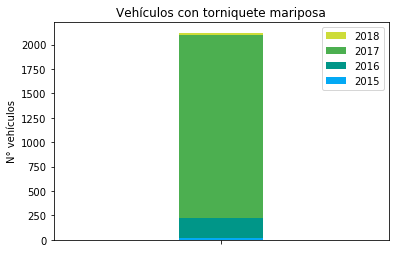

In [12]:
fig, ax = plt.subplots()
p1 = ax.bar(ind, start_count, width = width, color = colors[0])
p2 = ax.bar(ind, second_year_count, bottom = start_count, width = width, color = colors[1])
p3 = ax.bar(ind, third_year_count, bottom = start_count+second_year_count, width = width, color = colors[2])
p4 = ax.bar(ind, fourth_year_count, bottom = start_count+second_year_count+third_year_count, width = width, color = colors[3])
plt.xticks(ind, (' '))
ax.set_xlim(-2, 2)
ax.set_title('Vehículos con torniquete mariposa')
ax.set_ylabel('N° vehículos')
plt.legend((p4[0],p3[0],p2[0],p1[0]), ('2018','2017','2016','2015'))
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/0_vehWithTurnsByYear.pdf')

* Grouping by month-year

In [13]:
counts_by_month_year = ana_turnstile_df.groupby(['month_year']).size().to_frame().reset_index()
counts_by_month_year['month_year'] =  pd.to_datetime(counts_by_month_year['month_year'])
counts_by_month_year.columns = ['month_year', 'counts']
counts_by_month_year.sort_values(by=['month_year'], ascending=[True], inplace=True)
counts_by_month_year['Cumulative'] = counts_by_month_year['counts'].cumsum()

In [14]:
counts_by_month_year

,month_year,counts,Cumulative
12,2015-05-01,20,20
10,2016-04-01,18,38
13,2016-05-01,40,78
16,2016-07-01,36,114
18,2016-08-01,33,147
20,2016-09-01,4,151
2,2016-10-01,31,182
4,2016-11-01,5,187
6,2016-12-01,32,219
0,2017-01-01,17,236


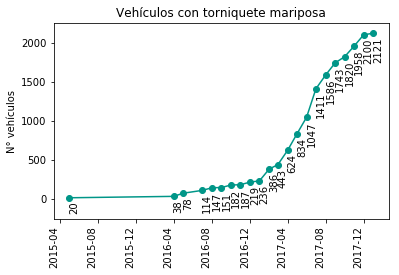

In [15]:
fig, ax_1 = plt.subplots()
ax_1.plot(counts_by_month_year['month_year'],counts_by_month_year['Cumulative'], 'o-', color=colors[1])
ax_1.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate(rotation=90)
#ax_1.grid(True)
ax_1.set_title('Vehículos con torniquete mariposa')
ax_1.set_ylim([-250,2250])
ax_1.set_ylabel('N° vehículos')
for (x,y) in zip(counts_by_month_year['month_year'],counts_by_month_year['Cumulative']):
    ax_1.annotate('%s' % y, xy=(x,y), xytext=(x,y-150),rotation='vertical')
    
plt.savefig('C:/Users/leoca_000/Desktop/Evasion/03_report/02_Figs/0_vehWithTurnsByMonth.pdf')

### Closed. ReadTurnstilesDataBase methods <font color = 'green'>passed</font> the tests